In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


In [2]:
# Load the data
# df = pd.read_csv('set.csv')
train_df = pd.read_csv('sets/train_set4.csv')
test_df = pd.read_csv('sets/test_set4.csv')

In [3]:
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [4]:
counts = {}
for string in y_train:
    if string in counts:
        counts[string] += 1
    else:
        counts[string] = 1

for string, count in counts.items():
    print(f"{string}: {count}")

angry: 18120
bored: 11471
disgust: 4243
happy: 6769
sad: 12878
shy: 5586
stressed: 6975
surprised: 6350


In [5]:
num_unique_labels = len(np.unique(y_train_encoded))

model = keras.Sequential([
    keras.layers.Dense(50, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(num_unique_labels, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_encoded, epochs=10,
          batch_size=32, validation_split=0.05)

Epoch 1/10
2150/2150 [==============================] - 8s 2ms/step - loss: 1.2305 - accuracy: 0.5466 - val_loss: 1.7945 - val_accuracy: 0.2862
Epoch 2/10
2150/2150 [==============================] - 4s 2ms/step - loss: 0.7672 - accuracy: 0.7351 - val_loss: 2.4356 - val_accuracy: 0.2514
Epoch 3/10
2150/2150 [==============================] - 4s 2ms/step - loss: 0.5480 - accuracy: 0.8177 - val_loss: 2.2189 - val_accuracy: 0.2580
Epoch 4/10
2150/2150 [==============================] - 4s 2ms/step - loss: 0.4418 - accuracy: 0.8537 - val_loss: 3.7206 - val_accuracy: 0.1953
Epoch 5/10
2150/2150 [==============================] - 4s 2ms/step - loss: 0.3771 - accuracy: 0.8764 - val_loss: 2.4466 - val_accuracy: 0.3334
Epoch 6/10
2150/2150 [==============================] - 4s 2ms/step - loss: 0.3186 - accuracy: 0.8952 - val_loss: 3.3570 - val_accuracy: 0.1878
Epoch 7/10
2150/2150 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.9027 - val_loss: 3.3368 - val_accuracy:

In [6]:
model_path = 'models/my_model9.h5'

In [7]:
model.save(model_path)

In [8]:
model = keras.models.load_model(model_path)

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print('Test accuracy:', str(test_acc * 100) + '%')


221/221 [==============================] - 1s 1ms/step - loss: 2.7672 - accuracy: 0.3855
Test accuracy: 38.54978084564209%


In [10]:
y_pred = model.predict(X_test)

y_pred_labels = le.inverse_transform(np.argmax(y_pred, axis=1))
y_test_labels = le.inverse_transform(y_test_encoded)

unique_labels = np.unique(y_test_labels)
for label in unique_labels:
    mask = y_test_labels == label
    acc = np.mean(y_pred_labels[mask] == label)
    print(f'Accuracy for {label}: {100*acc:.3f}')

221/221 [==============================] - 0s 821us/step
Accuracy for angry: 21.022
Accuracy for bored: 29.246
Accuracy for disgust: 34.127
Accuracy for happy: 92.264
Accuracy for sad: 35.971
Accuracy for shy: 47.340
Accuracy for stressed: 17.274
Accuracy for surprised: 42.466


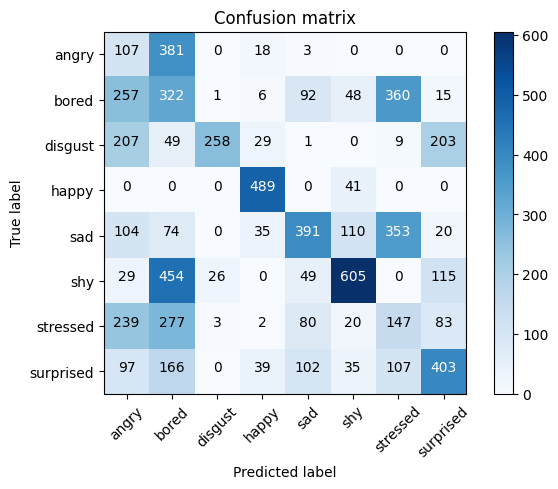

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

conf_matrix = confusion_matrix(
    y_test_labels, y_pred_labels, labels=unique_labels)
unique_labels = np.unique(y_test_labels)
plot_confusion_matrix(conf_matrix, classes=unique_labels)
plt.show()
